In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

In [401]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [417]:
df=pd.read_csv("wsb_cleaned_title.csv")

In [418]:
cond=(df['GME']>=1) | (df['AMC']>=1) | (df['BB']>=1) | (df['NOK']>=1) | (df['TSLA']>=1) 
cond2=df['text'].notna()
df=df[cond&cond2]
df.index=range(df.shape[0])#reset index num

In [419]:
df.shape

(16491, 13)

# EDA of whole posts

#### Bag-of-Words Vectorizer

In [390]:
bards_words=list(df['text'])

In [1000]:
bards_words[:5]

['exit system ceo nasdaq pushed halt trading give investors chance recalibrate positions mobile twitter com mediaite status mobile twitter com mediaite status sec investigating brokers disallowing buying calls institutions flat admitting change rules bail rich happens us get well shucks known investing risky tried cutting avocados coffee maybe uber side may collectively driven enough sentiment wall street make big players go long gme us money move stock much alone didnt hurt wall street whole funds went others went profited shorts us media wants pin blame us crystal clear rigged game time build new exchanges cant arbitrarily change rules us cr version maybe repurposed trade stock without government intervention dont know exactly look like yet broad next steps see exit current financial system build new one',
 'distract gme thought amc brothers aware',
 'currently holding amc nok retarded think move gme today',
 'need keep movement going make history believe right one rare opportunities

In [392]:
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [1001]:
#print("Vocabulary size: {}".format(len(vect.vocabulary_)))
#print("Vocabulary content:\n {}".format(vect.vocabulary_))

In [394]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <16491x47873 sparse matrix of type '<class 'numpy.int64'>'
	with 1030863 stored elements in Compressed Sparse Row format>


##### LDA

In [997]:

lda = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=0,n_jobs=-1)


In [998]:
document_topics = lda.fit_transform(bag_of_words)

KeyboardInterrupt: 

In [ ]:
print("lda.components_.shape: {}".format(lda.components_.shape))

In [ ]:
topic_top_words(vect,lda,5)#each topic words ranked by importance

# Creat topic list for each post

In [996]:
def topic_top_words(vect,lda,k):
    '''
    output top k words for each topic
    '''
    sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
    feature_names = np.array(vect.get_feature_names())
    
    topics=[]
    
    for i in range(len(sorting)):
        topic=feature_names[sorting[i,:k]]
        non_dup=True
        for topic_old in topics:#not adding duplicate topic
            if np.array_equal(topic_old,topic):
                non_dup=False
        if non_dup==True:
            topics.append(topic)
        
    return topics

In [425]:
def LDA_feature_generator(bards_words,n_components,k_words):
    
    '''
    generator a central topic of a post from n_components showing k_words each topic
    
    '''
    
    #vetorizer
    vect = CountVectorizer()
    vect.fit(bards_words)
    bag_of_words = vect.transform(bards_words)
    
    #LDA
    lda = LatentDirichletAllocation(n_components=n_components, learning_method="online", random_state=0)
    lda.fit_transform(bag_of_words)
    
    
    #topic words generation
    topics=topic_top_words(vect,lda,k_words)#call func: topic_top_words
    

    return topics

In [426]:
df.head(20)

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,TSLA,title_cleaned,title
0,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335,1,0,0,0,0,exit system,Exit the system
1,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,0,distract gme thought amc brothers aware,"Not to distract from GME, just thought our AMC..."
2,200,161,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...,currently holding amc nok retarded think move ...,95,1,1,0,1,0,currently holding amc nok retarded think move ...,Currently Holding AMC and NOK - Is it retarded...
3,222,70,2021-01-28 21:18:25,"We need to keep this movement going, we all ca...",need keep movement going make history believe ...,786,0,1,0,0,0,need keep movement going make history,"We need to keep this movement going, we all ca..."
4,562,97,2021-01-28 21:17:28,GME Premarket 🍁 Musk approved 🎮🛑💎✋,gme premarket musk approved,35,1,0,0,0,0,gme premarket musk approved,GME Premarket 🍁 Musk approved 🎮🛑💎✋
5,0,16,2021-01-28 21:17:10,"Once you're done with GME - $AG and $SLV, the ...",done gme ag slv gentleman short squeeze driven...,2230,1,0,0,0,0,done gme ag slv gentleman short squeeze driven...,"Once you're done with GME - $AG and $SLV, the ..."
6,382,61,2021-01-28 21:15:58,$GME price has nothing to do with fundamentals...,gme price nothing fundamentals everything fina...,5636,1,0,0,0,0,gme price nothing fundamentals everything fina...,$GME price has nothing to do with fundamentals...
7,240,49,2021-01-28 21:14:43,420 wasn’t a meme. GME 🚀 🚀 🚀,wasnt meme gme,29,1,0,0,0,0,wasnt meme gme,420 wasn’t a meme. GME 🚀 🚀 🚀
8,2739,646,2021-01-28 20:59:57,GME 420.69 Pre-Market. Repeat after me: $1000 ...,gme pre market repeat meme,61,1,0,0,0,0,gme pre market repeat meme,GME 420.69 Pre-Market. Repeat after me: $1000 ...
9,1172,323,2021-01-28 20:54:08,We need to stick together and 💎🖐 the ever lovi...,need stick together ever lovin shit opportunit...,930,1,1,0,0,0,need stick together ever lovin shit opportunit...,We need to stick together and 💎🖐 the ever lovi...


In [427]:
LDA_feature_generator([df['text'][15]],3,5)

[array(['calls', 'next', 'com', 'also', 'enough'], dtype='<U10'),
 array(['close', 'gme', 'calls', 'like', 'told'], dtype='<U10'),
 array(['another', 'told', 'ton', 'time', 'right'], dtype='<U10')]

In [428]:
df_f=df.copy()
df_f["topics"] = df_f["text"].apply(lambda x : LDA_feature_generator([x],3,5))


In [597]:
df_f.head(30)

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,TSLA,title_cleaned,title,topics
0,0,47,2021-01-28 21:30:35,Exit the system The CEO of NASDAQ pushed to ha...,exit system ceo nasdaq pushed halt trading giv...,1335,1,0,0,0,0,exit system,Exit the system,"[[chance, system, money, arbitrarily, profited..."
1,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,0,distract gme thought amc brothers aware,"Not to distract from GME, just thought our AMC...","[[amc, brothers, aware, thought, gme], [gme, a..."
2,200,161,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...,currently holding amc nok retarded think move ...,95,1,1,0,1,0,currently holding amc nok retarded think move ...,Currently Holding AMC and NOK - Is it retarded...,"[[gme, amc, retarded, today, currently], [nok,..."
3,222,70,2021-01-28 21:18:25,"We need to keep this movement going, we all ca...",need keep movement going make history believe ...,786,0,1,0,0,0,need keep movement going make history,"We need to keep this movement going, we all ca...","[[companies, believe, good, right, need], [com..."
4,562,97,2021-01-28 21:17:28,GME Premarket 🍁 Musk approved 🎮🛑💎✋,gme premarket musk approved,35,1,0,0,0,0,gme premarket musk approved,GME Premarket 🍁 Musk approved 🎮🛑💎✋,"[[musk, approved, gme, premarket], [musk, gme,..."
5,0,16,2021-01-28 21:17:10,"Once you're done with GME - $AG and $SLV, the ...",done gme ag slv gentleman short squeeze driven...,2230,1,0,0,0,0,done gme ag slv gentleman short squeeze driven...,"Once you're done with GME - $AG and $SLV, the ...","[[silver, ag, com, gme, www], [silver, traders..."
6,382,61,2021-01-28 21:15:58,$GME price has nothing to do with fundamentals...,gme price nothing fundamentals everything fina...,5636,1,0,0,0,0,gme price nothing fundamentals everything fina...,$GME price has nothing to do with fundamentals...,"[[market, shares, supply, demand, gme], [marke..."
7,240,49,2021-01-28 21:14:43,420 wasn’t a meme. GME 🚀 🚀 🚀,wasnt meme gme,29,1,0,0,0,0,wasnt meme gme,420 wasn’t a meme. GME 🚀 🚀 🚀,"[[wasnt, gme, meme], [wasnt, meme, gme], [gme,..."
8,2739,646,2021-01-28 20:59:57,GME 420.69 Pre-Market. Repeat after me: $1000 ...,gme pre market repeat meme,61,1,0,0,0,0,gme pre market repeat meme,GME 420.69 Pre-Market. Repeat after me: $1000 ...,"[[meme, gme, market, repeat, pre], [market, pr..."
9,1172,323,2021-01-28 20:54:08,We need to stick together and 💎🖐 the ever lovi...,need stick together ever lovin shit opportunit...,930,1,1,0,0,0,need stick together ever lovin shit opportunit...,We need to stick together and 💎🖐 the ever lovi...,"[[gme, us, need, people, together], [one, joke..."


In [448]:
df_f.iloc[0]['topics']

[array(['chance', 'system', 'money', 'arbitrarily', 'profited'],
       dtype='<U13'),
 array(['us', 'com', 'maybe', 'change', 'mediaite'], dtype='<U13'),
 array(['positions', 'look', 'new', 'wall', 'exactly'], dtype='<U13')]

In [449]:
df_f.iloc[0]['title']

'Exit the system'

In [451]:
df_f=df_f[df_f['title_cleaned'].notna()]


In [452]:
df_f.shape

(16475, 14)

title

In [487]:
titles=list(df_f['title_cleaned'])
words = [nltk.word_tokenize(title) for title in titles]#title broken inside
word=[w for word in words for w in word]

In [1002]:
word[:5]

['exit', 'system', 'ceo', 'nasdaq', 'pushed']

In [489]:
f_dist=nltk.FreqDist(w for w in word)

In [1003]:
f_dist.most_common(10)

[('gme', 23339),
 ('stock', 10600),
 ('shares', 10230),
 ('short', 9714),
 ('com', 8929),
 ('market', 8532),
 ('buy', 8510),
 ('amc', 8496),
 ('price', 8350),
 ('like', 8079)]

text

In [493]:
titles=list(df_f['text'])
words = [nltk.word_tokenize(title) for title in titles]#title broken inside
word=[w for word in words for w in word]

In [494]:
f_dist=nltk.FreqDist(w for w in word)

In [1004]:
f_dist.most_common(10)

[('gme', 23339),
 ('stock', 10600),
 ('shares', 10230),
 ('short', 9714),
 ('com', 8929),
 ('market', 8532),
 ('buy', 8510),
 ('amc', 8496),
 ('price', 8350),
 ('like', 8079)]

each post

In [563]:
title=df_f['text'][5]
words = nltk.word_tokenize(title)#title broken inside


In [564]:
f_dist=nltk.FreqDist(w for w in words)

In [565]:
f_dist.most_common(20)

[('silver', 10),
 ('ag', 6),
 ('com', 6),
 ('gme', 5),
 ('www', 4),
 ('slv', 3),
 ('short', 3),
 ('price', 3),
 ('bloomberg', 3),
 ('gold', 3),
 ('squeezed', 3),
 ('fair', 3),
 ('done', 2),
 ('squeeze', 2),
 ('banks', 2),
 ('fucking', 2),
 ('news', 2),
 ('articles', 2),
 ('precious', 2),
 ('metals', 2)]

# Feature Extractor

Ideas:
nlp:
1. conditional fdist
2.  Automated Readability Index (ARI)<-#sent,#word,.....
3. bigram, trigram... 


In [930]:
def feature_generator(k,df,text_col):
    '''
    return a n*k matrix: each post has the relative frequency in it of top k words in whole dataset 
    '''
    
    #whole text most common
    titles=list(df[text_col])
    words = [nltk.word_tokenize(title) for title in titles]#title broken inside
    word=[w for word in words for w in word]
    f_dist=nltk.FreqDist(w for w in word)
    most_common=f_dist.most_common(k)
    top_words=[word for (word,freq) in most_common]
  
    #generate a n*k matrix
    freqs=np.zeros((df.shape[0],k))
    for i in df.index:#better for if index irregular
        text=df[text_col][i]
        post = nltk.word_tokenize(text)
        f_dist=nltk.FreqDist(w for w in post)
        for j in range(k):
                freq=len(post)*f_dist.freq(top_words[j])
                freqs[i,j]=freq
    
    
    return freqs

In [931]:
df_new=df[df.index!=283]#something wrong w/ this single row 283
df_new.index=range(df_new.shape[0])

In [932]:
freqs=feature_generator(100,df_new,'text')

In [933]:
freqs

array([[1., 2., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [934]:
freqs.shape

(16490, 100)

In [935]:
def appear_only(freqs):
    freqs_appear=freqs.copy()
    for i in range(freqs_appear.shape[0]):
        for j in range(freqs_appear.shape[1]):
            if freqs_appear[i,j]>=1:
                freqs_appear[i,j]=1
    return freqs_appear

In [936]:
freqs_appear=appear_only(freqs)

In [937]:
freqs_appear

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [938]:
k=100

df_freqs=pd.DataFrame(freqs_appear,columns=list(range(k)))
df_new=pd.concat([df_new,df_freqs],axis=1)


In [950]:
df_new=df_new[df_new['score']>=1]
df_new.index=range(df_new.shape[0])

In [951]:
df_new.head()

,score,comms_num,timestamp,original_text,text,length,GME,AMC,BB,NOK,...,90,91,92,93,94,95,96,97,98,99
0,71,156,2021-01-28 21:26:56,"Not to distract from GME, just thought our AMC...",distract gme thought amc brothers aware,80,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200,161,2021-01-28 21:19:16,Currently Holding AMC and NOK - Is it retarded...,currently holding amc nok retarded think move ...,95,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,222,70,2021-01-28 21:18:25,"We need to keep this movement going, we all ca...",need keep movement going make history believe ...,786,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,562,97,2021-01-28 21:17:28,GME Premarket 🍁 Musk approved 🎮🛑💎✋,gme premarket musk approved,35,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,382,61,2021-01-28 21:15:58,$GME price has nothing to do with fundamentals...,gme price nothing fundamentals everything fina...,5636,1,0,0,0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [952]:
X=df_new[['length','GME','AMC','BB','NOK','TSLA']+list(range(50))]
y=np.log2(df_new['score'])


In [953]:
X.head()

,length,GME,AMC,BB,NOK,TSLA,0,1,2,3,...,40,41,42,43,44,45,46,47,48,49
0,80,0,1,0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,95,1,1,0,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,786,0,1,0,0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,1,0,0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5636,1,0,0,0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [954]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=42)

In [955]:
X_train.head()

,length,GME,AMC,BB,NOK,TSLA,0,1,2,3,...,40,41,42,43,44,45,46,47,48,49
5775,2623,1,0,0,0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7793,42,1,0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12253,5166,1,0,0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2820,292,1,0,0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9629,167,1,0,0,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model

In [956]:
rf = RandomForestRegressor(n_jobs=-1,min_samples_split=30, n_estimators=100,random_state=0,oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_jobs=-1, oob_score=True,
                      random_state=0)

In [957]:
rf.oob_score_

0.22008604277807653

In [975]:
def plot_feature_importances(model,names):
    plt.barh(range(model.n_features_), model.feature_importances_, align='center')
    plt.yticks(np.arange(model.n_features_), names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, model.n_features_)

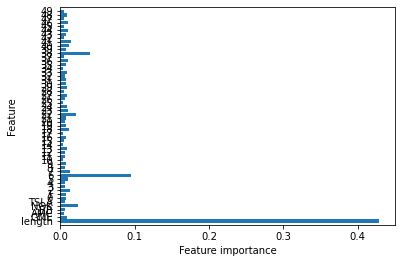

In [976]:
plot_feature_importances(rf,X_train.columns)

In [979]:
rf.feature_importances_

array([0.42870879, 0.00931503, 0.00518348, 0.0061074 , 0.02346932,
       0.00578736, 0.00837211, 0.00791454, 0.01254927, 0.00691143,
       0.00620747, 0.0105527 , 0.09562632, 0.01332091, 0.0058818 ,
       0.0078328 , 0.00382504, 0.00704728, 0.00616703, 0.00981241,
       0.00330893, 0.00512089, 0.0071459 , 0.00386206, 0.01142211,
       0.00751949, 0.00602517, 0.00826257, 0.02190912, 0.01035229,
       0.00917253, 0.00371704, 0.00582474, 0.00920008, 0.00512265,
       0.00870168, 0.00808688, 0.00744035, 0.00605597, 0.00913937,
       0.00435201, 0.00732489, 0.01058978, 0.00478068, 0.04066937,
       0.00724952, 0.01128576, 0.01502238, 0.00518976, 0.00846087,
       0.01112922, 0.00555856, 0.01111395, 0.00543437, 0.00877584,
       0.00508076])

In [980]:
X_train.columns

Index(['length',    'GME',    'AMC',     'BB',    'NOK',   'TSLA',        0,
              1,        2,        3,        4,        5,        6,        7,
              8,        9,       10,       11,       12,       13,       14,
             15,       16,       17,       18,       19,       20,       21,
             22,       23,       24,       25,       26,       27,       28,
             29,       30,       31,       32,       33,       34,       35,
             36,       37,       38,       39,       40,       41,       42,
             43,       44,       45,       46,       47,       48,       49],
      dtype='object')

In [986]:
rf_importances=sorted([(X_train.columns[i],rf.feature_importances_[i]) for i in range(rf.n_features_) ],key=lambda x : x[1],reverse=True)

In [987]:
rf_importances[:5]

[('length', 0.4287087935435439),
 (6, 0.09562631711009804),
 (38, 0.04066936693685229),
 ('NOK', 0.02346932198948079),
 (22, 0.02190911744136089)]

In [989]:
text_col='text'
titles=list(df[text_col])
words = [nltk.word_tokenize(title) for title in titles]#title broken inside
word=[w for word in words for w in word]
f_dist=nltk.FreqDist(w for w in word)
most_common=f_dist.most_common(k)
top_words=[word for (word,freq) in most_common]

In [993]:
pd.Series(top_words)[[6,38,22]]

6           buy
38    robinhood
22         hold
dtype: object

In [1005]:
most_common[:5]

[('gme', 23339),
 ('stock', 10600),
 ('shares', 10230),
 ('short', 9714),
 ('com', 8929)]